# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [64]:
import pandas as pd
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

In [101]:
df.std()

temperature    0.733183
heart_rate     7.062077
dtype: float64

In [66]:
import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# seed the random number generator so we all get the same results
numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline


In [67]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = numpy.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

In [77]:
list=((df.temperature//.25)*.25).value_counts().sort_index()


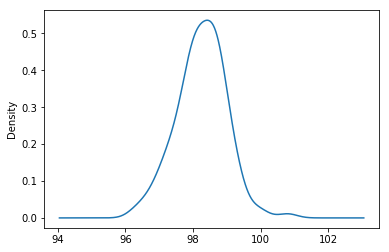

In [78]:
df.temperature.plot.density()

In [79]:
#new2=df[(new.mean()-new.std())<new]
#new=df[(df.temperature.mean()-df.temperature.std()<df.temperature) & (df.temperature < df.temperature.mean()+df.temperature.std())]

In [88]:
#size of the sample
n=len(df)

In [89]:
# Is the true population mean really 98.6 degrees F?

#     Would you use a one-sample or two-sample test? Why?  
#     In this situation, is it appropriate to use the $t$ or $z$ statistic? 
#     Now try using the other test. How is the result be different? Why?


In [90]:
# 1. one sample because error on either of the 2 sides is bad
# 2. Z table as the number of samples is high (>10)

df.temperature.mean()

98.24923076923078

In [91]:
df.temperature.std()

0.7331831580389454

In [96]:
std_dev_sampling_distribution= df.temperature.std()/(scipy.sqrt(n))

In [97]:
std_dev_sampling_distribution

0.06430441683789101

In [103]:
z_value=(98.24923076923078 - 98.6)*-1/std_dev_sampling_distribution

In [104]:
z_value

5.4548232923640789

In [127]:
1 - (scipy.stats.norm.cdf(z_value))

2.4510785068265761e-08

In [125]:
scipy.stats.t.sf(z_value, 129)

1.2053160207804971e-07

In [128]:
margin_of_error=df.temperature.std()/(scipy.sqrt(n))

In [129]:
margin_of_error

0.06430441683789101

In [171]:
df.temperature.mean() + scipy.stats.norm.ppf(.95) *  std_dev_sampling_distribution

98.355002122495577

In [172]:
df.temperature.mean() - scipy.stats.norm.ppf(.95) *  std_dev_sampling_distribution

98.143459415965978

In [173]:
df.temperature.mean()

98.24923076923078

In [185]:
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = numpy.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
        
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return numpy.array(stats)
    
    def plot_sampling_distribution(self):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = numpy.percentile(sample_stats, [5, 95])
        me= sample_stats.mean()
        
        pyplot.hist(sample_stats, color=COLOR2)
        pyplot.xlabel('sample statistic')
        pyplot.xlim(self.xlim)
        text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
        text(0.03, 0.85, 'SE %0.2f' % se)
        text(0.03, 0.75, 'mean %0.2f' % me)
        pyplot.show()

In [192]:
temp_array=numpy.array(df.temperature)
resampler_object=Resampler(temp_array)

In [193]:
resampler_object.sample_stat(temp_array )

98.249230769230749

In [202]:
resampled_array=resampler_object.compute_sampling_distribution(iters=1000)

In [203]:
resampled_array.std()

0.065468461787011156

In [204]:
numpy.percentile(resampled_array, [5, 95])

array([ 98.14223077,  98.35692308])

In [205]:
##Is there a significant difference between males and females in normal temperature?
##What test did you use and why? : Cohens d
##Write a story with your conclusion in the context of the original problem

In [206]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

In [211]:
df_female=df[df.gender=='F']

In [212]:
df_male=df[df.gender=='M']

In [219]:
male_array=numpy.array(df_male.temperature)
female_array=numpy.array(df_female.temperature)

In [224]:
CohenEffectSize(female_array,male_array)

0.40401156497371221

In [226]:
diff=female_array - male_array

In [227]:
diff.mean()

0.28923076923077007

In [228]:
diff.std()

1.0322675677172786

In [229]:
diff.mean()/diff.std()

0.28018972820231597

In [234]:
scipy.stats.norm.cdf(.280)

0.61026124755579725

In [235]:
## 61% of women have a higher temperature than men
## cohen effect size is .404 .. pretty high overlap=82%

In [238]:
h=(female_array>male_array)

In [240]:
h.mean()

0.55384615384615388

In [250]:
female_array_resample = numpy.random.choice(female_array, 200, replace=True)

In [251]:
male_array_resample = numpy.random.choice(male_array, 200, replace=True)

In [252]:
h_2=(female_array_resample>male_array_resample)

In [254]:
h_2.mean()

0.60999999999999999

In [256]:
threshold=(male_array_resample.mean()*female_array_resample.std() + female_array_resample.mean()*male_array_resample.std() )/(male_array_resample.std() + female_array_resample.std())

In [259]:
male_overlap=sum(male_array_resample>threshold)/len(male_array_resample)

In [261]:
female_overlap=sum(female_array_resample<threshold)/len(female_array_resample)

In [264]:
misclassification_rate = (male_overlap + female_overlap) / 2
overlap=male_overlap + female_overlap

In [267]:
overlap 

0.82499999999999996